# Section 11 : Working with Dates and Times in Datasets 

##### 11.1 Intro to the Working with Dates and Times Module

In [3]:
import pandas as pd 
import datetime as dt
from pandas_datareader import data 
from pandas.tseries import offsets

##### 11.2 Review of Python's datetime module

In [4]:
someday = dt.date(2023, 7, 22)

In [5]:
someday.year
someday.month
someday.day

22

In [ ]:
dt.datetime(2023, 7, 22) 
#datetime.datetime(2023, 7, 22, 0, 0) 
# first 0 = hour
# second 0 = minute
# (2023, 7, 22, 0, 0) = วันที่ 22 เดือน July ปี 2023 ตอน mid night 00.00

In [ ]:
dt.datetime(2023, 7, 22, 8, 30, 19) 
# 8 hours : 30 mins : 19 seconds AM 

In [ ]:
str(dt.datetime(2023, 7, 22,22, 40, 47))

In [ ]:
sometime = dt.datetime(2023, 7, 22,22, 40, 47)

sometime.year
sometime.month
sometime.day
sometime.hour
sometime.minute
sometime.second

##### 11.3 The pandas Timestamp Object
- Timestamp obj ดีกว่า python datetime obj เพราะเราสามารถจัดการกับข้อมูลเกี่ยวกับเวลาได้ดีกว่า 

In [ ]:
pd.Timestamp("2023-04-13")
pd.Timestamp("2023, 04, 13")
pd.Timestamp("2023/04/13")

pd.Timestamp("13/4/2023")
pd.Timestamp("4/13/2023")

pd.Timestamp("2023-04-13 23:45:30")
pd.Timestamp("2023-04-13 11:45:30 PM")

In [ ]:
pd.Timestamp(dt.date(2015, 1, 1))

In [ ]:
pd.Timestamp(dt.datetime(2015, 1, 1, 21, 35, 22))

##### 11.4 The pandas DateTimeIndex Object 

In [ ]:
dates = ["2016/01/02","1999/04/13", "2009/09/07" ]
pd.DatetimeIndex(dates)
#จะเปลี่ยน those string ใน list ให้เป็น datetime index โดยมี dtype เป็น datetime64

In [ ]:
type(pd.DatetimeIndex(dates))

In [ ]:
dates = [dt.date(2016,1,10),dt.date(1994,6,13), dt.date(2003,12,29) ]
dtIndex = pd.DatetimeIndex(dates)

In [ ]:
values = [100,200,300]
pd.Series(data=values,index=dtIndex)

In [ ]:
dates = [dt.datetime(2016,1,10,23,15,25),dt.datetime(1994,6,13,19,10,39), dt.datetime(2003,12,29,11,10,15) ]
dtIndex = pd.DatetimeIndex(dates)

In [ ]:
values = [100,200,300]
pd.Series(data=values,index=dtIndex)

##### 11.5 The pd.to_datetime() Method

In [ ]:
pd.to_datetime("2001-04-19")
pd.to_datetime(dt.date(2019,5,25))
pd.to_datetime(dt.datetime(2019,5,25,14,35,20))
pd.to_datetime(["2015-03-15","2014/04/25", "July 4th, 1996","1999"])

In [ ]:
times = pd.Series(["2015-03-15","2014/04/25", "July 4th, 1996","1999"])
times

In [ ]:
pd.DatetimeIndex(times)

In [ ]:
dates = pd.Series(["July 4th, 1996","10/04/1991","Hello","2015-02-31"])
dates

In [ ]:
pd.to_datetime(dates)
## error 
## Unknown string format: Hello present at position 2

In [ ]:
pd.to_datetime(dates, errors="coerce")
#NaN = null for string, float, interger, bool, ...
#NaT = null for datetime object 

In [ ]:
pd.to_datetime([1349720105, 1349806505,1349892905,1349979305,1350065705])
# same as 
#pd.to_datetime([1349720105, 1349806505,1349892905,1349979305,1350065705], 
               unit = "ns")
# by default, unit = "ns" 1 nanosecond  = 1e-9 second  

#Datetime on python start at January 1st 1970 

In [ ]:
pd.to_datetime([1349720105, 1349806505,1349892905,1349979305,1350065705], 
               unit="s")
# s stands for second 
# the number of seconds since January 1st 1970 

##### 11.6 Create Range of Dates with the pd.date_range() Method, Part 1

In [ ]:
times = pd.date_range(start="2016-01-01", end = "2016-01-10", freq="D")
# "D" stands for (D)ay
# DatetimeIndex is a list of collections of Timestamp objects
times

In [ ]:
type(times)
# DatetimeIndex is a list of collections of Timestamp objects

In [ ]:
times[0]
# DatetimeIndex is a list of collections of Timestamp objects

In [ ]:
type(times[0])

In [ ]:
pd.date_range(start="2016-01-01", end = "2016-01-10", freq="1D")
#1D = (1) (D)ay
pd.date_range(start="2016-01-01", end = "2016-01-10", freq="2D")
#2D = (2) (D)ays 

In [ ]:
pd.date_range(start="2016-01-01", end = "2016-01-10", freq="B")
# "B" stands for "Business Day" (Mon-Fri) จันทร์ to ศุกร์ **skip เสาร์ อาทิตย์ 

In [ ]:
pd.date_range(start="2016-01-05", end = "2016-02-29", freq="W")
# "W" stands for "One day per (W)eek" โดยจะเลือกวันอาทิตย์ "Sunday" by default
# อาทิตย์ที่จะถึง อาทิตย์์ถัดไปจากค่าที่ 1 อาทิตย์ถัดไปจากค่าที่ 2 ... จนถึงอาทิตย์สุดท้าย (ไม่เกินวันที่ end = "2016-02-29")


pd.date_range(start="2016-01-05", end = "2016-01-25", freq="W-FRI")
# "W-FRI" stands for "One day per (W)eek" โดยจะเลือกวันศุกร์ (Fri)day มา
# ศุกร์ที่จะถึง ศุกร์ถัดไปจากค่าที่ 1 ศุกร์ถัดไปจากค่าที่ 2 ... จนถึงศุกร์สุดท้าย (ไม่เกินวันที่ end = "2016-01-25")

In [ ]:
pd.date_range(start="2016-01-05", end = "2016-01-15", freq="H")
pd.date_range(start="2016-01-05", end = "2016-01-15", freq="6H")
# "H" stands for "(H)our"
# "6H" = 6 hour 

In [ ]:
pd.date_range(start="2016-01-02", end = "2016-12-15", freq="M")
# "M" stands for "Last of the (M)onth " 
# วันสุดท้ายของเดือนนี้, วันสุดท้ายของเดือนถัดไปจากค่าที่1, วันสุดท้ายของเดือนถัดไปจากค่าที่2, ... , วันสุดท้ายของเดือนสุดท้าย (ไม่เกินวันที่ "2016-12-19")



pd.date_range(start="2016-01-02", end = "2016-12-19", freq="MS")
# "MS" stands for "(S)tart/First day of each (M)onths"
# วันแรกของเดือนที่จะถึง, วันแรกของเดือนถัดไปจากค่าที่1, วันแรกของเดือนถัดไปจากค่าที่2 ... , วันแรกของเดือนสุดท้าย (ไม่เกินวันที่ "2016-12-19")

In [ ]:
pd.date_range(start="2016-01-01", end = "2025-12-19", freq="A")
# "A" stands for "last day of each (A)nnual years"  
# เลือกวันสุดท้ายของปีมา

pd.date_range(start="2016-01-01", end = "2025-12-19", freq="AS")
# "AS" stands for "(S)tart/First day of each (A)nnual years" 
# เลือกวันแรกของปีมา

In [ ]:
pd.date_range(start="2016-01-01", end = "2016-01-02", freq="S")
# "S" stands for "(S)econd"

##### 11.7 Create Range of Dates with the pd.date_range() Method, Part 2

In [ ]:
pd.date_range(start= "2012-09-09", periods = 25)
#same as
pd.date_range(start= "2012-09-09", periods = 25, freq="D")
# การระบุ periods  คือการบอกว่าต้องการให้ pandas สร้าง Timestamp ใน DatetimeIndex ทั้งหมดกี่ค่า 
# periods = 25 หมายความว่า pd.date_range() จะสร้าง Timestamp มาทั้งหมด 25 ค่า
# by default, freq = "D" หรือ Day

In [ ]:
pd.date_range(start= "2012-09-09", periods = 50, freq="B")
# Business Day (Mon-Fri) จันทร์ to ศุกร์ skip เสาร์ อาทิตย์ 
# 50 values

In [ ]:
pd.date_range(start= "2012-09-09", periods = 20, freq="W")
# Week day  
# by default = sunday (อาทิตย์ที่จะถึงนี้ อาทิตย์ถัดไปจา่กค่าที่ 1 อาทิตย์ถัดไปจา่กค่าที่ 2 ...)
# 20 Values

In [ ]:
pd.date_range(start= "2012-09-09", periods = 5, freq="W-Tue")
# Week day
# Tuesday = (อังคารที่จะถึงนี้ อังคารถัดไปจา่กค่าที่ 1 อังคารถัดไปจา่กค่าที่ 2 ...)
# 5 Values

In [ ]:
pd.date_range(start= "2012-09-09", periods = 10, freq="MS")
# M = Month 
# S = Start 
# MS = Start Month 
# วันแรกของเดือนที่จะถึง, วันแรกของเดือนถัดไปของค่าที่ 1, วันแรกของเดือนถัดไปของค่าที่ 2, ...)
# 10 values 

In [ ]:
pd.date_range(start= "2012-09-09", periods = 10, freq="A")
# Annual 
# วันสุดท้ายของปีนี้, วันสุดท้ายของปีถัดไปของค่าที่ 1, วันสุดท้ายของเดือนถัดไปของค่าที่ 2, ...)
# 10 values

In [ ]:
pd.date_range(start= "2012-09-09", periods = 500, freq="6H")
# 6 hours
# 500 values 

##### 11.8 Create Range of Dates with the pd.date_range() Method, Part 3

In [ ]:
pd.date_range(end="1999-12-25", periods=20, freq="D")
# Day
# move back from 1999-12-25 till it has 20 values 

In [ ]:
pd.date_range(end="1999-12-25", periods=40, freq="B")
# Business day
# move back from 1999-12-25 till it has 40 values 

In [ ]:
pd.date_range(end="1999-12-25", periods=15, freq="W-SUN") # or only "W" ได้ค่าเดียวกัน
# sunday of the week
# move back from 1999-12-25 till it has 15 values 

In [ ]:
pd.date_range(end="1999-12-25", periods=15, freq="W-FRI")
# friday of the week 
# move back from 1999-12-25 till it has 20 values 

In [ ]:
pd.date_range(end="1999-12-25", periods=15, freq="M")
# Month ends 
# move back from 1999-12-25 till it has 15 values 

In [ ]:
pd.date_range(end="1999-12-25", periods=35, freq="MS")
# Month Start 
# move back from 1999-12-25 till it has 35 values 

In [ ]:
pd.date_range(end="1999-12-25", periods=12, freq="8H")
# 8 hours 
# move back from 1999-12-25 till it has 12 values 

##### 11.9 The .dt Accessor

In [ ]:
bunch_of_dates = pd.date_range(start = "2000-01-01", 
                               end = "2010-12-31", 
                               freq = "24D")
bunch_of_dates

In [ ]:
s = pd.Series(bunch_of_dates)
s.head(3)

In [ ]:
s.dt.day
#ใช้ .day อย่างเดียวไม่ได้ เพราะว่า s เป็น series obj ไม่ได้เป็น timestamp รือ datetime obj
#ต้องใช้ .dt.day ลักษณะเดียวกันกับ .str.upper() ตอน working with text 

s.dt.day_name()
#s.dt.weekday_name is outdated เลิกใช้ไปแน้ววว 

In [ ]:
#mask = s.dt.is_quarter_start
#mask = s.dt.is_quarter_end
#etc. 
mask = s.dt.is_month_end
s[mask]

##### 11.10 Import Financial Dataset with pandas_datareader Library
- ใช้ data module ใน pandas_datareader เพื่อ get ข้อมูลจาก outsource

In [2]:
import pandas as pd
import datetime as dt
from pandas_datareader import data 

In [3]:
stocks = data.DataReader(name = "MSFT", data_source = "stooq", start= "2010-01-01", end = "2023-07-23")
#MSFT = Microsoft stock prices data 
#stooq คือ website ที่เราไปเอาข้อมูลมา
stocks.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-21,349.15,350.30,339.830,343.77,69405382.0
2023-07-20,353.57,357.97,345.370,346.87,33778395.0
2023-07-19,361.75,362.46,352.435,355.08,39732901.0


In [4]:
stocks.values

array([[3.49150000e+02, 3.50300000e+02, 3.39830000e+02, 3.43770000e+02,
        6.94053820e+07],
       [3.53570000e+02, 3.57970000e+02, 3.45370000e+02, 3.46870000e+02,
        3.37783950e+07],
       [3.61750000e+02, 3.62460000e+02, 3.52435000e+02, 3.55080000e+02,
        3.97329010e+07],
       ...,
       [2.42642000e+01, 2.44230000e+01, 2.39852000e+01, 2.41758000e+01,
        7.40325385e+07],
       [2.42542000e+01, 2.44389000e+01, 2.40765000e+01, 2.43267000e+01,
        6.33117379e+07],
       [2.40854000e+01, 2.44389000e+01, 2.40358000e+01, 2.43178000e+01,
        4.88691616e+07]])

In [5]:
stocks.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [6]:
stocks.index

DatetimeIndex(['2023-07-21', '2023-07-20', '2023-07-19', '2023-07-18',
               '2023-07-17', '2023-07-14', '2023-07-13', '2023-07-12',
               '2023-07-11', '2023-07-10',
               ...
               '2010-01-15', '2010-01-14', '2010-01-13', '2010-01-12',
               '2010-01-11', '2010-01-08', '2010-01-07', '2010-01-06',
               '2010-01-05', '2010-01-04'],
              dtype='datetime64[ns]', name='Date', length=3410, freq=None)

In [7]:
stocks.axes

[DatetimeIndex(['2023-07-21', '2023-07-20', '2023-07-19', '2023-07-18',
                '2023-07-17', '2023-07-14', '2023-07-13', '2023-07-12',
                '2023-07-11', '2023-07-10',
                ...
                '2010-01-15', '2010-01-14', '2010-01-13', '2010-01-12',
                '2010-01-11', '2010-01-08', '2010-01-07', '2010-01-06',
                '2010-01-05', '2010-01-04'],
               dtype='datetime64[ns]', name='Date', length=3410, freq=None),
 Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')]

##### 11.11 Selecting Rows from a DataFrame with a Datetime Index

In [8]:
import pandas as pd
import datetime as dt
from pandas_datareader import data 
stocks = data.DataReader(name = "MSFT", data_source= "stooq", start = "2010-01-01", end = "2023-07-24" )
#MSFT = Microsoft stock prices data 
#stooq คือ website ที่เราไปเอาข้อมูลมา
stocks.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-24,345.85,346.92,342.31,345.11,26719207.0
2023-07-21,349.15,350.30,339.83,343.77,69405382.0
2023-07-20,353.57,357.97,345.37,346.87,33778395.0


In [9]:
stocks.loc["2023-07-10"]

Open           334.60
High           335.23
Low            327.59
Close          331.83
Volume    32791449.00
Name: 2023-07-10 00:00:00, dtype: float64

In [10]:
#prefer using pd.Timestamp to represent datetime obj
stocks.loc[pd.Timestamp("2023-07-10")]

Open           334.60
High           335.23
Low            327.59
Close          331.83
Volume    32791449.00
Name: 2023-07-10 00:00:00, dtype: float64

In [11]:
stocks.iloc[250]
stocks.iloc[-3]
#stocks.iloc[5000000000] #error 
stocks.iloc[0]

Open           345.85
High           346.92
Low            342.31
Close          345.11
Volume    26719207.00
Name: 2023-07-24 00:00:00, dtype: float64

In [12]:
stocks.loc[["2010-01-04","2010-01-05"]]  #not recommend 
stocks.loc[[pd.Timestamp("2010-01-04"),pd.Timestamp("2010-01-05")]] #prefer #recommend 

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,24.0854,24.4389,24.0358,24.3178,4.886916e+07
2010-01-05,24.2542,24.4389,24.0765,24.3267,6.331174e+07


In [13]:
stocks.loc[[pd.Timestamp("2010-01-04"),pd.Timestamp("2010-01-05"),"2023-07-21"]] 
#ควรใส่ Timstamp ก็ Timpstamp ให้หมด # หรือ strก็ str ให้หมด  
#stocks.loc[[pd.Timestamp("2010-01-04"),pd.Timestamp("2010-01-05"),pd.Timestamp("2023-07-21")]]  #prefer # recommend 
#stocks.loc[["2010-01-04","2010-01-05","2023-07-21"]]  #not recommend 

KeyError: "['2023-07-21'] not in index"

In [ ]:
stocks.loc[[pd.Timestamp("2010-01-04"),pd.Timestamp("2010-01-05"),pd.Timestamp("2023-07-21"),pd.Timestamp("1999-05-11")]] 
#error เพราะไม่มี index label "1999-05-11"

In [ ]:
stocks.iloc[[1,200,3,400,5]]
#stocks.iloc[[1,200,3,400,5000000000000]]
#error เพราะ ไม่มี index position 5000000000000

In [ ]:
stocks.loc["2013-10-01" : "2013-10-07"]
# ioc หรือ index label จะ include end point ด้วย ซึ่งก็คือ "2013-10-07"
stocks.truncate(before = "2013-10-01", after = "2013-10-07") #ลบ rows ที่เป็นวันที่ก่อน "2013-10-01" และ ลบ rows ที่เป็นวันที่หลัง "2013-10-07" 

In [ ]:
stocks.iloc[1000:1005]
# iloc หรือ index position จะ NOT include end point ด้วย ซึ่งก็คือ index position 1005 จะไม่ได้เอามาด้วย 

In [ ]:
pd.date_range(start = "1999-04-13", end = "2023-12-31", freq = pd.DateOffset(years = 1))
# pd.Offset(year = 1) คือการนับ frequency เป็น 1 ปีจริง   
# note ว่าบางปีมี 365 วัน บางปีมี 366 วัน การใช้ pd.Offset(year = 1) ; python จะรู้เองว่ามีปีไหน 365 ปีไหน 366 บ้าง แล้วเราจะได้วันที่ ถูกต้อง 

# freq = "A" คือ end of year นั้น
# freq = "AS" คือ start of year นั้น 
# freq = "Y" คือ end of year นั้น เหมือนกับ "A"

In [ ]:
birthdays = pd.date_range(start = "1999-04-13", end = "2023-12-31", freq = pd.DateOffset(years = 1))

In [ ]:
birthdays_stocks = stocks.index.isin(birthdays)

In [ ]:
stocks[birthdays_stocks]
#same as 
stocks.loc[birthdays_stocks]

#### 11.12 Timestamp Object Attributes and Mthods

In [ ]:
stocks = data.DataReader(name = "MSFT", data_source="stooq", start = "2010-01-01", end = "2023-12-31")
stocks.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-25,347.11,351.89,345.07,350.98,41637739.0
2023-07-24,345.85,346.92,342.31,345.11,26719207.0
2023-07-21,349.15,350.30,339.83,343.77,69405382.0


In [ ]:
someday = stocks.index[500]
someday

Timestamp('2021-07-28 00:00:00')

In [ ]:
someday.month
someday.week
someday.day
someday.is_month_start
someday.is_month_end
someday.is_quarter_start
someday.is_quarter_end
someday.quarter

3

In [ ]:
someday.month_name()
someday.day_name()

'Wednesday'

In [ ]:
stocks.index.day_name()

Index(['Tuesday', 'Monday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday',
       'Monday', 'Friday', 'Thursday', 'Wednesday',
       ...
       'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Friday',
       'Thursday', 'Wednesday', 'Tuesday', 'Monday'],
      dtype='object', name='Date', length=3412)

In [ ]:
stocks.insert(loc=0,column="Day of Week",value=stocks.index.day_name())
stocks

,Day of Week,Open,High,Low,Close,Volume
Date,,,,,,
2023-07-25,Tuesday,347.1100,351.8900,345.0700,350.9800,4.163774e+07
2023-07-24,Monday,345.8500,346.9200,342.3100,345.1100,2.671921e+07
2023-07-21,Friday,349.1500,350.3000,339.8300,343.7700,6.940538e+07
2023-07-20,Thursday,353.5700,357.9700,345.3700,346.8700,3.377840e+07
2023-07-19,Wednesday,361.7500,362.4600,352.4350,355.0800,3.973290e+07
...,...,...,...,...,...,...
2010-01-08,Friday,23.7837,24.2642,23.7608,24.0934,6.515561e+07
2010-01-07,Thursday,24.0537,24.1232,23.7221,23.9257,6.434577e+07
2010-01-06,Wednesday,24.2642,24.4230,23.9852,24.1758,7.403254e+07


In [ ]:
stocks.insert(loc=1,column="Is Start of Month", value=stocks.index.is_month_start)
stocks

,Day of Week,Is Start of Month,Open,High,Low,Close,Volume
Date,,,,,,,
2023-07-25,Tuesday,False,347.1100,351.8900,345.0700,350.9800,4.163774e+07
2023-07-24,Monday,False,345.8500,346.9200,342.3100,345.1100,2.671921e+07
2023-07-21,Friday,False,349.1500,350.3000,339.8300,343.7700,6.940538e+07
2023-07-20,Thursday,False,353.5700,357.9700,345.3700,346.8700,3.377840e+07
2023-07-19,Wednesday,False,361.7500,362.4600,352.4350,355.0800,3.973290e+07
...,...,...,...,...,...,...,...
2010-01-08,Friday,False,23.7837,24.2642,23.7608,24.0934,6.515561e+07
2010-01-07,Thursday,False,24.0537,24.1232,23.7221,23.9257,6.434577e+07
2010-01-06,Wednesday,False,24.2642,24.4230,23.9852,24.1758,7.403254e+07


In [ ]:
stocks[stocks["Is Start of Month"]]

,Day of Week,Is Start of Month,Open,High,Low,Close,Volume
Date,,,,,,,
2023-06-01,Thursday,True,325.9300,333.5300,324.7200,332.5800,2.677385e+07
2023-05-01,Monday,True,306.9700,308.6000,305.1500,305.5600,2.129412e+07
2023-03-01,Wednesday,True,250.7600,250.9300,245.7900,246.2700,2.756526e+07
2023-02-01,Wednesday,True,248.0000,255.1800,245.4700,252.7500,3.125991e+07
2022-12-01,Thursday,True,253.8700,256.1200,250.9156,254.6900,2.604152e+07
...,...,...,...,...,...,...,...
2010-07-01,Thursday,True,18.1428,18.3235,17.8589,18.1964,1.173523e+08
2010-06-01,Tuesday,True,20.0906,20.6763,20.0559,20.3438,9.687786e+07
2010-04-01,Thursday,True,23.0619,23.2089,22.4861,22.9120,9.513903e+07


In [ ]:
stocks["Day of Week"].value_counts()

Tuesday      701
Wednesday    700
Thursday     690
Friday       684
Monday       637
Name: Day of Week, dtype: int64

#### 11.13 The pd.DateOffset.Object 

In [42]:
stocks = data.DataReader(name = "MSFT",data_source ="stooq",start = "2010-01-01", end = "2020-12-31")
stocks.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,217.822,219.104,215.838,218.528,2.131555e+07
2020-12-30,221.277,221.674,217.595,217.802,2.063381e+07
2020-12-29,222.350,223.214,219.659,220.205,1.771353e+07


In [29]:
stocks["High"]

Date
2020-12-31    219.1040
2020-12-30    221.6740
2020-12-29    223.2140
2020-12-28    222.0710
2020-12-24    219.6890
                ...   
2010-01-08     24.2642
2010-01-07     24.1232
2010-01-06     24.4230
2010-01-05     24.4389
2010-01-04     24.4389
Name: High, Length: 2769, dtype: float64

In [30]:
# +-*/ ผ่านผ่านไปยัง index ที่เป็น datetime64 obj หรือ Timestamp obj ได้ 
# ถ้า Index เป็น str หรือ int float พวกนี้ทำได้
stocks.index + 5 
#error 

TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [31]:
#ให้ใช้ pd.DateOffset() method ในการ +- day week month year etc.เข้าไป
stocks.index + pd.DateOffset(days= 5)
stocks.index - pd.DateOffset(days= 5)
stocks.index = stocks.index - pd.DateOffset(days= 5)
stocks.index = stocks.index + pd.DateOffset(days= 5)


In [40]:
stocks.index + pd.DateOffset(weeks = 2)
stocks.index - pd.DateOffset(weeks = 3)

stocks.index + pd.DateOffset(months = 3)
stocks.index - pd.DateOffset(months = 5)

stocks.index + pd.DateOffset(years = 1)
stocks.index - pd.DateOffset(years = 30)

stocks.index - pd.DateOffset(years = 30,months=3,days=10,hours=6,minutes=24,seconds=26)

DatetimeIndex(['1990-09-19 17:35:34', '1990-09-19 17:35:34',
               '1990-09-18 17:35:34', '1990-09-17 17:35:34',
               '1990-09-13 17:35:34', '1990-09-12 17:35:34',
               '1990-09-11 17:35:34', '1990-09-10 17:35:34',
               '1990-09-07 17:35:34', '1990-09-06 17:35:34',
               ...
               '1979-10-04 17:35:34', '1979-10-03 17:35:34',
               '1979-10-02 17:35:34', '1979-10-01 17:35:34',
               '1979-09-30 17:35:34', '1979-09-27 17:35:34',
               '1979-09-26 17:35:34', '1979-09-25 17:35:34',
               '1979-09-24 17:35:34', '1979-09-23 17:35:34'],
              dtype='datetime64[ns]', name='Date', length=2769, freq=None)

#### 11.13 Timeseries Offsets

In [49]:
stocks = data.DataReader(name = "MSFT",data_source ="stooq",start = "2010-01-01", end = "2023-07-27").sort_values(by = "Date", axis = 0)
stocks.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,24.0854,24.4389,24.0358,24.3178,4.886916e+07
2010-01-05,24.2542,24.4389,24.0765,24.3267,6.331174e+07
2010-01-06,24.2642,24.4230,23.9852,24.1758,7.403254e+07


In [50]:
# จาก 11.12 เราใช้ .DateOffset() Method เพื่อที่จะเปลี่ยนแปลงค่า index ประเภท datetime64 or timestamp ไปแล้ว 
# จะเห็นได้ว่าเราสามารถ +- days weeks months years ได้ 
# ถ้าหากเราต้องการ normalize ข้อมูลให้เป็น End date of months ล่ะ เราไม่สามารถใช้ .DateOffset() Method เพื่อบวกหรือลบค่าทุกแถวให้มีค่าเป็น end date of month ได้
# แต่เรามีสิ่งที่เรียกว่า timeseries offsets หรือ pd.tseries.offsets มาตอบโจทย์สิ่งที่เราต้องการนี้ได้ 
stocks.index + pd.tseries.offsets.MonthEnd()

DatetimeIndex(['2010-01-31', '2010-01-31', '2010-01-31', '2010-01-31',
               '2010-01-31', '2010-01-31', '2010-01-31', '2010-01-31',
               '2010-01-31', '2010-01-31',
               ...
               '2023-07-31', '2023-07-31', '2023-07-31', '2023-07-31',
               '2023-07-31', '2023-07-31', '2023-07-31', '2023-07-31',
               '2023-07-31', '2023-07-31'],
              dtype='datetime64[ns]', name='Date', length=3413, freq=None)

In [65]:
stocks["2020-04-29":"2020-05-01"]

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-29,168.860,173.198,167.559,172.980,5.261035e+07
2020-04-30,175.470,175.868,171.798,174.697,5.526648e+07
2020-05-01,171.371,174.140,169.634,170.190,4.038669e+07


In [68]:
#ข้อควรระวัง !!!

stocks["2020-04-29":"2020-05-01"].index + pd.tseries.offsets.MonthEnd()
#เครื่องหมาย + หมายความข้อมูลระหว่างเดือน ("2020-04-29") จะถูกปัดขึ้นเป็นปลายเดือนนี้ ("2020-04-30"), วันสุดท้ายของเดือนซึ่งอยู่ขอบ boundary ("2020-04-30") จะถูกปัดขึ้นเป็นปลายเดือนหน้า ("2020-05-31")


#ลองดูผลลัพธ์ของ pd.tseries.offsets.MonthEnd() ที่มีต่อ "2020-04-30" ซึ่งเป็นวันสุดท้ายของเดือนอยู่แล้ว 
#การใช้ pd.tseries.offsets.MonthEnd() คือเราต้องการให้ "2020-04-30" ยังมีผลลัพธ์ที่เป็นวันสุดท้ายของเดือน ก็คือ  "2020-04-30" ตามเดิมอยู่
#แต่มันกลับกลายเป็นเปลี่ยนค่าจาก '2020-04-30' เป็น '2020-05-31' ซึ่งเป็นวันสุดท้ายของเดือนหน้าเฉยเลย 
#โดยเวลา pandas มันคำนวณค่า "2020-04-30" มันอยู่ขอบ boundary ของวันสุดท้ายของเดือน 4 พอดี ทำให้มันจะปัดขึ้นไปเป็นเดือน 5 เลย 



DatetimeIndex(['2020-04-30', '2020-05-31', '2020-05-31'], dtype='datetime64[ns]', name='Date', freq=None)

In [73]:
stocks["2020-04-29":"2020-05-01"].index - pd.tseries.offsets.MonthEnd()
#เครื่องหมาย - หมายความข้อมูลระหว่างเดือน ("2020-04-29") จะถูกปัดลงเป็นปลายเดือนก่อน ("2020-03-31"), วันสุดท้ายของเดือนซึ่งอยู่ขอบ boundary ("2020-04-30") จะถูกปัดลงเป็นปลายเดือนก่อน ("2020-03-31")

DatetimeIndex(['2020-03-31', '2020-03-31', '2020-04-30'], dtype='datetime64[ns]', name='Date', freq=None)

In [77]:
stocks["2020-04-29":"2020-05-01"].index + pd.tseries.offsets.MonthBegin()
#เครื่องหมาย - หมายความข้อมูลระหว่างเดือน ("2020-04-29") จะถูกปัดขึ้นเป็นต้นเดือนหน้า ("2020-05-01"), วันที่ 1 ของเดือนถัดไปซึ่งอยู่ขอบ boundary ('2020-05-01') จะถูกปัดขึ้นเป็น '2020-06-01' 

DatetimeIndex(['2020-05-01', '2020-05-01', '2020-06-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [78]:
stocks["2020-04-29":"2020-05-01"].index - pd.tseries.offsets.MonthBegin()
#เครื่องหมาย - หมายความข้อมูลระหว่างเดือนจะถูกปัดลงเป็นต้นเดือน, วันที่ 1 ของเดือนถัดไปซึ่งอยู่ขอบ boundary ('2020-05-01') จะถูกปัดลงเป็น '2020-04-01' ด้วยเช่นกัน

DatetimeIndex(['2020-04-01', '2020-04-01', '2020-04-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [87]:
from pandas.tseries import offsets 
## เพื่อการใช้งาน offsets prefix ที่ง่ายขึ้น 

In [84]:
stocks.index + offsets.MonthBegin()
stocks.index - offsets.MonthBegin()
stocks.index + offsets.MonthEnd()
stocks.index - offsets.MonthEnd()

DatetimeIndex(['2009-12-31', '2009-12-31', '2009-12-31', '2009-12-31',
               '2009-12-31', '2009-12-31', '2009-12-31', '2009-12-31',
               '2009-12-31', '2009-12-31',
               ...
               '2023-06-30', '2023-06-30', '2023-06-30', '2023-06-30',
               '2023-06-30', '2023-06-30', '2023-06-30', '2023-06-30',
               '2023-06-30', '2023-06-30'],
              dtype='datetime64[ns]', name='Date', length=3413, freq=None)

In [95]:
#business day ไม่นับ เสาร์อาทิตย์ 
stocks.index + offsets.BMonthEnd()  # business day วันสุดท้ายของเดือนนั้น  
stocks.index - offsets.BMonthEnd()  # business day วันสุดท้ายของเดือนก่อนหน้า 
stocks.index + offsets.BMonthBegin() # business day วันแรกของเดือนหน้า  
stocks.index - offsets.BMonthBegin() # business day วันแรกของเดือนนั้น

DatetimeIndex(['2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01',
               ...
               '2023-07-03', '2023-07-03', '2023-07-03', '2023-07-03',
               '2023-07-03', '2023-07-03', '2023-07-03', '2023-07-03',
               '2023-07-03', '2023-07-03'],
              dtype='datetime64[ns]', name='Date', length=3413, freq=None)

In [99]:
stocks.index + offsets.BYearBegin()
stocks.index - offsets.BYearBegin()

stocks.index + offsets.BYearEnd()
stocks.index - offsets.BYearEnd()

DatetimeIndex(['2009-12-31', '2009-12-31', '2009-12-31', '2009-12-31',
               '2009-12-31', '2009-12-31', '2009-12-31', '2009-12-31',
               '2009-12-31', '2009-12-31',
               ...
               '2022-12-30', '2022-12-30', '2022-12-30', '2022-12-30',
               '2022-12-30', '2022-12-30', '2022-12-30', '2022-12-30',
               '2022-12-30', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=3413, freq=None)

#### 11.14 The Timedelta object
- Timedelta = the different or duration  between two times

In [8]:
time_a = pd.Timestamp("2023-03-31 04:35:16PM")
time_b = pd.Timestamp("2023-03-20 02:15:48AM")
time_a - time_b

Timedelta('11 days 14:19:28')

In [9]:
time_b - time_a

Timedelta('-12 days +09:40:32')

In [16]:
pd.Timedelta(weeks=252,days=3,hours=20,minutes=45,seconds=299)
#ใส่ months กับ years ไม่ได้ 
# cannot construct a Timedelta from the passed arguments, allowed keywords are [weeks, days, hours, minutes, seconds, milliseconds, microseconds, nanoseconds]

Timedelta('1767 days 20:49:59')

In [20]:
#ใช้ str ได้ด้วยอ่ะ 
pd.Timedelta("6 hours 12 minutes 59 seconds")
pd.Timedelta("14 days 6 hours 12 minutes 59 seconds")


Timedelta('14 days 06:12:59')

#### 11.15 Timedeltas in a Dataset

In [25]:
shipping  = pd.read_csv("ecommerce.csv",index_col="ID",parse_dates=["order_date","delivery_date"])
shipping.head(3)

,order_date,delivery_date
ID,,
1,1998-05-24,1999-02-05
2,1992-04-22,1998-03-06
4,1991-02-10,1992-08-26


In [30]:
shipping["Delivery time"] = shipping["delivery_date"] - shipping["order_date"]
shipping.head(3)

,order_date,delivery_date,Delivery time
ID,,,
1,1998-05-24,1999-02-05,257 days
2,1992-04-22,1998-03-06,2144 days
4,1991-02-10,1992-08-26,563 days


In [34]:
shipping["next_delivery_date"]  = shipping["delivery_date"] + shipping["Delivery time"]
shipping

,order_date,delivery_date,Delivery time,next_delivery_date
ID,,,,
1,1998-05-24,1999-02-05,257 days,1999-10-20
2,1992-04-22,1998-03-06,2144 days,2004-01-18
4,1991-02-10,1992-08-26,563 days,1994-03-12
5,1992-07-21,1997-11-20,1948 days,2003-03-22
7,1993-09-02,1998-06-10,1742 days,2003-03-18
...,...,...,...,...
990,1991-06-24,1996-02-02,1684 days,2000-09-12
991,1991-09-09,1998-03-30,2394 days,2004-10-18
993,1990-11-16,1998-04-27,2719 days,2005-10-06


In [35]:
shipping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 1 to 997
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order_date          501 non-null    datetime64[ns] 
 1   delivery_date       501 non-null    datetime64[ns] 
 2   Delivery time       501 non-null    timedelta64[ns]
 3   next_delivery_date  501 non-null    datetime64[ns] 
dtypes: datetime64[ns](3), timedelta64[ns](1)
memory usage: 19.6 KB


In [39]:
mask = shipping["Delivery time"] >= "3423 Days"
shipping[mask]

,order_date,delivery_date,Delivery time,next_delivery_date
ID,,,,
130,1990-04-02,1999-08-16,3423 days,2008-12-29
314,1990-03-07,1999-12-25,3580 days,2009-10-13
884,1990-01-20,1999-11-12,3583 days,2009-09-03
904,1990-02-13,1999-11-15,3562 days,2009-08-16


In [41]:
shipping["Delivery time"].describe()

count                             501
mean     1217 days 22:53:53.532934128
std       917 days 21:51:05.029340032
min                   8 days 00:00:00
25%                 423 days 00:00:00
50%                 998 days 00:00:00
75%                1901 days 00:00:00
max                3583 days 00:00:00
Name: Delivery time, dtype: object

# Section 12 : Imput and Output in pandas


#### 12.1 Intro to the Input and Output Section

In [4]:
import pandas as pd 

#### 12.2 Pass a URL to the pd.read_csv Method

In [50]:
url = "https://data.cityofnewyork.us/api/views/25th-nujf/rows.csv?accessType=DOWNLOAD"
baby_names = pd.read_csv(url)
baby_names.head(3)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42


In [52]:
baby_names["Child's First Name"].to_frame()

,Child's First Name
0,GERALDINE
1,GIA
2,GIANNA
3,GISELLE
4,GRACE
...,...
57577,Yousef
57578,Youssef
57579,Yusuf
57580,Zachary


In [53]:
baby_names["Child's First Name"].to_list()

['GERALDINE',
 'GIA',
 'GIANNA',
 'GISELLE',
 'GRACE',
 'GUADALUPE',
 'HAILEY',
 'HALEY',
 'HANNAH',
 'HAYLEE',
 'HAYLEY',
 'HAZEL',
 'HEAVEN',
 'HEIDI',
 'HEIDY',
 'HELEN',
 'IMANI',
 'INGRID',
 'IRENE',
 'IRIS',
 'ISABEL',
 'ISABELA',
 'ISABELLA',
 'ISABELLE',
 'ISIS',
 'ITZEL',
 'IZABELLA',
 'JACQUELINE',
 'JADA',
 'JADE',
 'JAELYNN',
 'JAMIE',
 'JANELLE',
 'JASLENE',
 'JASMIN',
 'JASMINE',
 'JAYDA',
 'JAYLA',
 'JAYLAH',
 'JAYLEEN',
 'JAYLENE',
 'JAYLIN',
 'JAYLYN',
 'JAZLYN',
 'JAZMIN',
 'JAZMINE',
 'JENNIFER',
 'JESSICA',
 'JIMENA',
 'JOCELYN',
 'JOHANNA',
 'JOSELYN',
 'JULIA',
 'JULIANA',
 'JULIANNA',
 'JULIET',
 'JULIETTE',
 'JULISSA',
 'KAELYN',
 'KAILEY',
 'KAILYN',
 'KAITLYN',
 'KAMILA',
 'KAREN',
 'KARLA',
 'KATE',
 'KATELYN',
 'KATELYNN',
 'KATHERINE',
 'KATIE',
 'KAYLA',
 'KAYLEE',
 'KAYLEEN',
 'KAYLEIGH',
 'KAYLIE',
 'KAYLIN',
 'KEILY',
 'KELLY',
 'KEYLA',
 'KHLOE',
 'KIARA',
 'KIMBERLY',
 'KRYSTAL',
 'KYLEE',
 'KYLIE',
 'LAILA',
 'LAURA',
 'LAUREN',
 'LAYLA',
 'LEA',
 'L

In [56]:
baby_names["Child's First Name"].to_dict()
#Python dictionary มีข้อห้าม ที่จะไม่ยอมให้มีค่า duplicates ของ indexes เกิดขึ้น โดยมันจะคัดเอา a last duplicate index มาเป็นตัวแทน แล้วตัวอื่นตัดทิ้ง !!! ข้อมูลหายปุย

{0: 'GERALDINE',
 1: 'GIA',
 2: 'GIANNA',
 3: 'GISELLE',
 4: 'GRACE',
 5: 'GUADALUPE',
 6: 'HAILEY',
 7: 'HALEY',
 8: 'HANNAH',
 9: 'HAYLEE',
 10: 'HAYLEY',
 11: 'HAZEL',
 12: 'HEAVEN',
 13: 'HEIDI',
 14: 'HEIDY',
 15: 'HELEN',
 16: 'IMANI',
 17: 'INGRID',
 18: 'IRENE',
 19: 'IRIS',
 20: 'ISABEL',
 21: 'ISABELA',
 22: 'ISABELLA',
 23: 'ISABELLE',
 24: 'ISIS',
 25: 'ITZEL',
 26: 'IZABELLA',
 27: 'JACQUELINE',
 28: 'JADA',
 29: 'JADE',
 30: 'JAELYNN',
 31: 'JAMIE',
 32: 'JANELLE',
 33: 'JASLENE',
 34: 'JASMIN',
 35: 'JASMINE',
 36: 'JAYDA',
 37: 'JAYLA',
 38: 'JAYLAH',
 39: 'JAYLEEN',
 40: 'JAYLENE',
 41: 'JAYLIN',
 42: 'JAYLYN',
 43: 'JAZLYN',
 44: 'JAZMIN',
 45: 'JAZMINE',
 46: 'JENNIFER',
 47: 'JESSICA',
 48: 'JIMENA',
 49: 'JOCELYN',
 50: 'JOHANNA',
 51: 'JOSELYN',
 52: 'JULIA',
 53: 'JULIANA',
 54: 'JULIANNA',
 55: 'JULIET',
 56: 'JULIETTE',
 57: 'JULISSA',
 58: 'KAELYN',
 59: 'KAILEY',
 60: 'KAILYN',
 61: 'KAITLYN',
 62: 'KAMILA',
 63: 'KAREN',
 64: 'KARLA',
 65: 'KATE',
 66: 'KATE

In [58]:
"!".join(["a","b","c"])

'a!b!c'

In [67]:
#โจทย์คือ สมมติว่า หัวหน้าเราต้องการให้เรา 
#1. ทำให้ ชื่อ the Child's First Name ขึ้นต้นด้วยตัวใหญ่ในทุกเว้นวรรค
#2. remove duplicates,
#3. sort in ascending, 

#Step1 เราจะทำการ concatenate ", " เข้าไป เพื่อให้ ", " ทำหน้าที่เสมือนตัวคั่นชื่อ 
", ".join(baby_names["Child's First Name"].str.title().drop_duplicates().sort_values())

"Aahil, Aaliyah, Aarav, Aaron, Aarya, Aaryan, Aayan, Aayat, Abby, Abdiel, Abdoul, Abdoulaye, Abdul, Abdullah, Abdulloh, Abe, Abel, Abigail, Aboubacar, Abraham, Abrar, Abrielle, Abril, Abubakr, Ace, Ada, Adalynn, Adam, Adan, Addison, Adelaide, Adele, Adelina, Adeline, Adelyn, Adelynn, Aden, Adiel, Adina, Aditya, Adonis, Adrian, Adriana, Adrianna, Adriel, Adyan, Ahad, Aharon, Ahmad, Ahmed, Ahnaf, Ahron, Ahuva, Aicha, Aidan, Aiden, Ailani, Aileen, Aimee, Aisha, Aissata, Aissatou, Aitana, Aiza, Aizah, Akiva, Alahia, Alaia, Alaina, Alan, Alana, Alani, Alanis, Alanna, Alayna, Alba, Albert, Alberto, Aldo, Aleah, Alec, Aleena, Alejandra, Alejandro, Aleksander, Aleksandra, Alessandra, Alessandro, Alessia, Alex, Alexa, Alexander, Alexandra, Alexandria, Alexia, Alexis, Alfred, Alfredo, Ali, Alia, Aliah, Alice, Alicia, Alijah, Alina, Alisa, Alisha, Alison, Alissa, Alisson, Aliya, Aliyah, Aliza, Allan, Allen, Allison, Allyson, Alma, Alondra, Alonso, Alpha, Alston, Alter, Alvin, Alyson, Alyssa, Amad

#### 12.3 Export CSV File with the to_csv Method

In [5]:
url = "https://data.cityofnewyork.us/api/views/25th-nujf/rows.csv?accessType=DOWNLOAD"
baby_names = pd.read_csv(url)
baby_names.head(3)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42


In [6]:
baby_names.to_csv("NYC_Baby_Names.csv")
#จะเห็นได้ว่า มันจะมี index ติดไปด้วยในไฟล์ csv นั้น
#================================================= 
#,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
#0,2011,FEMALE,HISPANIC,GERALDINE,13,75
#1,2011,FEMALE,HISPANIC,GIA,21,67
#2,2011,FEMALE,HISPANIC,GIANNA,49,42
#3,2011,FEMALE,HISPANIC,GISELLE,38,51
#4,2011,FEMALE,HISPANIC,GRACE,36,53

In [9]:
baby_names.to_csv("NYC_Baby_Names.csv", index= False)
#เราสามารถ set index = False ได้ เพื่อจะได้ไม่เอา index ติดไปด้วย 
#==============================================================
#Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
#2011,FEMALE,HISPANIC,GERALDINE,13,75
#2011,FEMALE,HISPANIC,GIA,21,67
#2011,FEMALE,HISPANIC,GIANNA,49,42
#2011,FEMALE,HISPANIC,GISELLE,38,51
#2011,FEMALE,HISPANIC,GRACE,36,53


In [11]:
baby_names.to_csv("NYC_Baby_Names.csv", index= False, columns=["Gender","Ethnicity","Child's First Name"])
#เราสามารถ set index = False ได้ เพื่อจะได้ไม่เอา index ติดไปด้วย + เราระบุแค่ columns ที่เราต้องการจะ export  ออกไป
#==============================================================
#Gender,Ethnicity,Child's First Name
#FEMALE,HISPANIC,GERALDINE
#FEMALE,HISPANIC,GIA
#FEMALE,HISPANIC,GIANNA
#FEMALE,HISPANIC,GISELLE


In [13]:
baby_names.to_csv("NYC_Baby_Names.csv", index= False, columns=["Gender","Ethnicity","Child's First Name"],encoding="utf-8")
#เราสามารถ set index = False ได้ เพื่อจะได้ไม่เอา index ติดไปด้วย 
#+ เราระบุแค่ columns ที่เราต้องการจะ export  ออกไป 
#+ แนะนำให้ใส่ encoding ไปด้วย เพราะบางที pandas ไม่รู้วิธีเขียน characters บางตัว เลยให้ใช้ encoding="utf-8" ซึ่งเป็น unicode สากล รับรู้ภาษาอังกฤษ

#A character in UTF8 can be from 1 to 4 bytes long. 
#UTF-8 can represent any character in the Unicode standard. 
#UTF-8 is backwards compatible with ASCII. 
#UTF-8 is the preferred encoding for e-mail and web pages

#==============================================================
#Gender,Ethnicity,Child's First Name
#FEMALE,HISPANIC,GERALDINE
#FEMALE,HISPANIC,GIA
#FEMALE,HISPANIC,GIANNA
#FEMALE,HISPANIC,GISELLE


#### 12.4 Install xlrd and openpyxl Libraries to Read and Write Excel Files

- run command นี้ conda install xlrd openpyxl ใน anaconda prompt

#### 12.5 Import Excel File into pandas with the read_excel Method

In [9]:
#มี Sheet เดียว
df = pd.read_excel("Data - Single Worksheet.xlsx")
df

,First Name,Last Name,City,Gender
0,Brandon,James,Miami,M
1,Sean,Hawkins,Denver,M
2,Judy,Day,Los Angeles,F
3,Ashley,Ruiz,San Francisco,F
4,Stephanie,Gomez,Portland,F


In [27]:
#มีหลาย Sheets 

#เลือกมา 1 sheet 
df1 = pd.read_excel("Data - Multiple Worksheets.xlsx",sheet_name=0)
df2 = pd.read_excel("Data - Multiple Worksheets.xlsx",sheet_name=1) #or df2 = pd.read_excel("Data - Multiple Worksheets.xlsx",sheet_name="Data 2")

#เลือก multiple sheets 
df1_df2 = pd.read_excel("Data - Multiple Worksheets.xlsx",sheet_name=[0,1])
df1_df2 = pd.read_excel("Data - Multiple Worksheets.xlsx",sheet_name=["Data 1","Data 2"])
df1_df2

#Sheet_name = 0 
#{0:   First Name Last Name           City Gender
# 0    Brandon     James          Miami      M
# 1       Sean   Hawkins         Denver      M
# 2       Judy       Day    Los Angeles      F
# 3     Ashley      Ruiz  San Francisco      F
# 4  Stephanie     Gomez       Portland      F,
#Sheet_name = 1 or Sheet_name = "Data 2"
# 1:   First Name Last Name           City Gender
# 0     Parker     Power        Raleigh      F
# 1    Preston  Prescott   Philadelphia      F
# 2    Ronaldo   Donaldo         Bangor      M
# 3      Megan   Stiller  San Francisco      M
# 4     Bustin    Jieber         Austin      F}
#------------------------------------------------------


#Sheet_name = "Data 1"
#{'Data 1':   First Name Last Name           City Gender
# 0    Brandon     James          Miami      M
# 1       Sean   Hawkins         Denver      M
# 2       Judy       Day    Los Angeles      F
# 3     Ashley      Ruiz  San Francisco      F
# 4  Stephanie     Gomez       Portland      F,
#Sheet_name = "Data 2"
# 'Data 2':   First Name Last Name           City Gender
# 0     Parker     Power        Raleigh      F
# 1    Preston  Prescott   Philadelphia      F
# 2    Ronaldo   Donaldo         Bangor      M
# 3      Megan   Stiller  San Francisco      M
# 4     Bustin    Jieber         Austin      F}

{'Data 1':   First Name Last Name           City Gender
 0    Brandon     James          Miami      M
 1       Sean   Hawkins         Denver      M
 2       Judy       Day    Los Angeles      F
 3     Ashley      Ruiz  San Francisco      F
 4  Stephanie     Gomez       Portland      F,
 'Data 2':   First Name Last Name           City Gender
 0     Parker     Power        Raleigh      F
 1    Preston  Prescott   Philadelphia      F
 2    Ronaldo   Donaldo         Bangor      M
 3      Megan   Stiller  San Francisco      M
 4     Bustin    Jieber         Austin      F}

In [25]:
type(df1_df2)

dict

In [28]:
df1_df2["Data 1"]
df1_df2["Data 2"]

,First Name,Last Name,City,Gender
0,Parker,Power,Raleigh,F
1,Preston,Prescott,Philadelphia,F
2,Ronaldo,Donaldo,Bangor,M
3,Megan,Stiller,San Francisco,M
4,Bustin,Jieber,Austin,F


In [32]:
#เลือกทุก sheets ที่มี
df1_df2 = pd.read_excel("Data - Multiple Worksheets.xlsx",sheet_name= None)
df1_df2

{'Data 1':   First Name Last Name           City Gender
 0    Brandon     James          Miami      M
 1       Sean   Hawkins         Denver      M
 2       Judy       Day    Los Angeles      F
 3     Ashley      Ruiz  San Francisco      F
 4  Stephanie     Gomez       Portland      F,
 'Data 2':   First Name Last Name           City Gender
 0     Parker     Power        Raleigh      F
 1    Preston  Prescott   Philadelphia      F
 2    Ronaldo   Donaldo         Bangor      M
 3      Megan   Stiller  San Francisco      M
 4     Bustin    Jieber         Austin      F}

#### 12.6 Export Excel File with the to_excel Method

In [51]:
url = "https://data.cityofnewyork.us/api/views/25th-nujf/rows.csv?accessType=DOWNLOAD"
baby_names = pd.read_csv(url)
baby_names.head(3)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42


In [52]:
boys = baby_names[baby_names["Gender"] == "MALE"]
girls = baby_names[baby_names["Gender"] == "FEMALE"]

In [53]:
boys 

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
363,2013,MALE,HISPANIC,Jared,25,80
416,2013,MALE,HISPANIC,Jariel,25,80
547,2011,MALE,ASIAN AND PACIFIC ISLANDER,AARAV,15,51
548,2011,MALE,ASIAN AND PACIFIC ISLANDER,AARON,51,19
549,2011,MALE,ASIAN AND PACIFIC ISLANDER,ABDUL,20,46
...,...,...,...,...,...,...
57577,2014,MALE,WHITE NON HISPANIC,Yousef,18,94
57578,2014,MALE,WHITE NON HISPANIC,Youssef,24,88
57579,2014,MALE,WHITE NON HISPANIC,Yusuf,16,96
57580,2014,MALE,WHITE NON HISPANIC,Zachary,90,39


In [54]:
excel_file = pd.ExcelWriter("Baby_Names.xlsx")

In [61]:
girls.to_excel(excel_file,sheet_name="Girls",index=False)

In [62]:
boys.to_excel(excel_file,sheet_name="Boys",index=False, columns=["Year of Birth","Gender","Ethnicity"])

In [63]:
excel_file.save()

C:\Users\Windows11\AppData\Local\Temp\ipykernel_31716\900623283.py:1: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_file.save()


# Section 13 : Visualization 

#### 13.1 Intro to Visualization Section

In [139]:
import pandas as pd 
import datetime as dt
from pandas_datareader import data
import matplotlib.pyplot  as plt

#the additional line of code that is required to render visualizations
%matplotlib inline

#### 13.2 Use the plot Method to Render a Line Chart
- .plot(kind = "line") or .plot() ;default

In [68]:
blackberry = data.DataReader(name = "BB", data_source= "stooq", start= "2007-01-01",end= "2023-07-28")
blackberry.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-27,4.74,4.76,4.615,4.64,3650761.0
2023-07-26,4.69,4.73,4.640,4.67,2853430.0
2023-07-25,4.72,4.77,4.700,4.70,2813746.0


<Axes: xlabel='Date'>

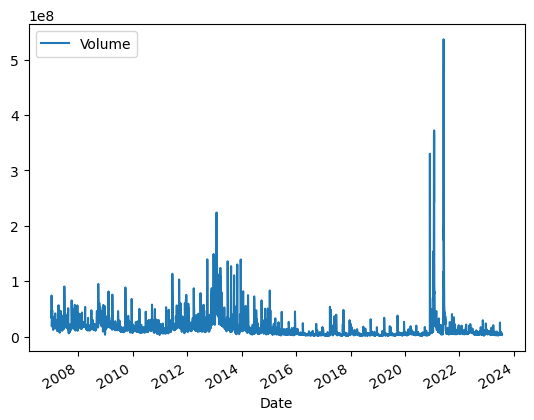

In [72]:
blackberry.plot(y = "Volume")

<Axes: xlabel='Date'>

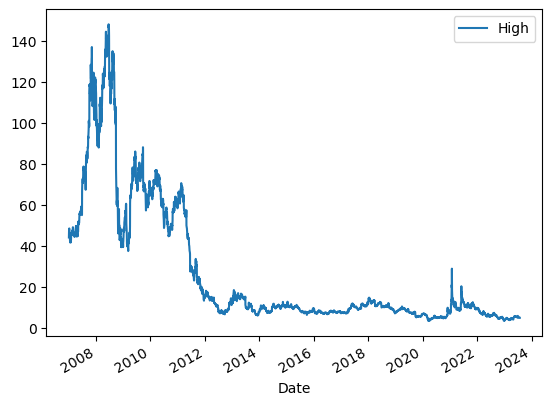

In [74]:
blackberry.plot(y = "High")

<Axes: xlabel='Date'>

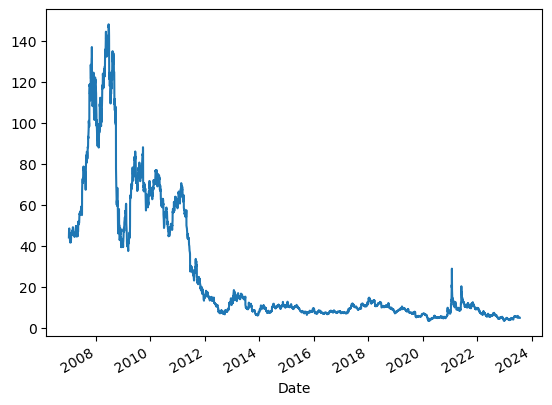

In [75]:
blackberry["High"].plot()

<Axes: xlabel='Date'>

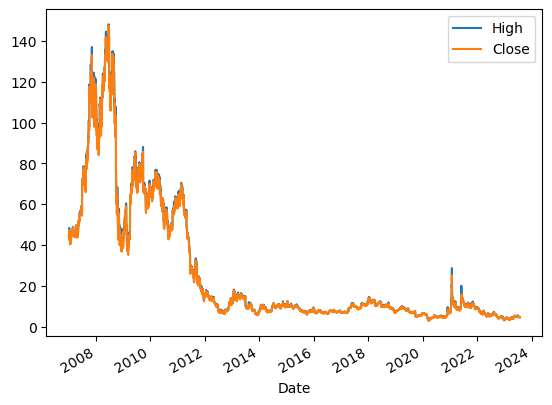

In [76]:
blackberry[["High","Close"]].plot()

#### 13.3 Modifying Plot Aesthetics with matplotlib Templates


- Show available templates, themes 
    -  plt.style.available
- Should template to use 
    - plt.style.use("ggplot")

In [138]:
blackberry = data.DataReader(name = "BB", data_source= "stooq", start= "2007-01-01",end= "2023-07-28")
blackberry.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-27,4.74,4.76,4.615,4.64,3650761.0
2023-07-26,4.69,4.73,4.640,4.67,2853430.0
2023-07-25,4.72,4.77,4.700,4.70,2813746.0


In [106]:
plt.style.available
# templates, themes 

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: xlabel='Date'>

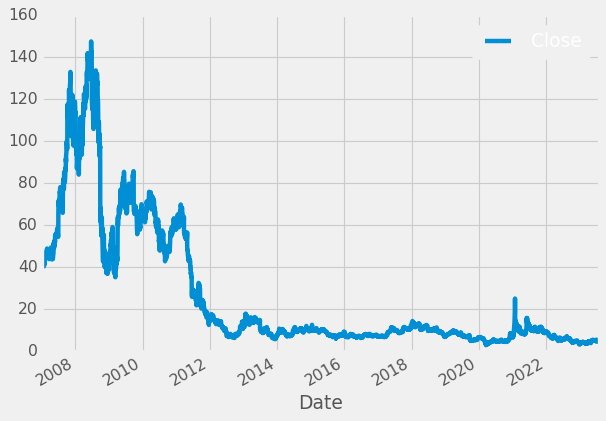

In [107]:
plt.style.use('fivethirtyeight')
blackberry.plot(y="Close")

<Axes: xlabel='Date'>

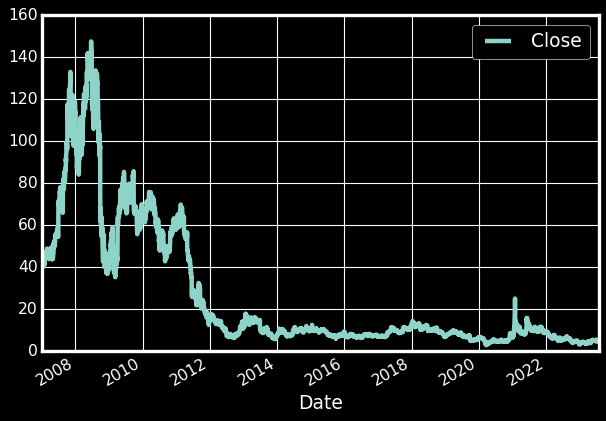

In [108]:
plt.style.use('dark_background')
blackberry.plot(y="Close")

<Axes: xlabel='Date'>

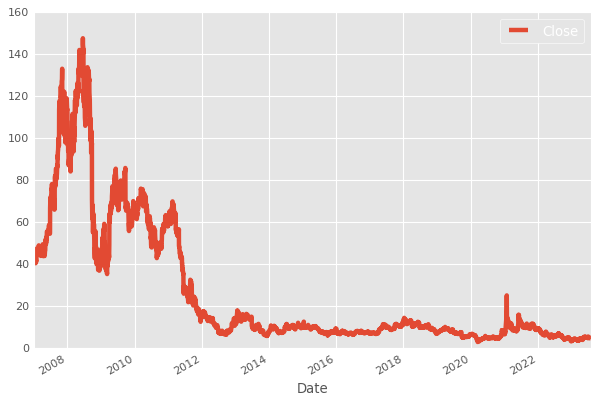

In [109]:
plt.style.use('ggplot')
blackberry.plot(y="Close")

<Axes: xlabel='Date'>

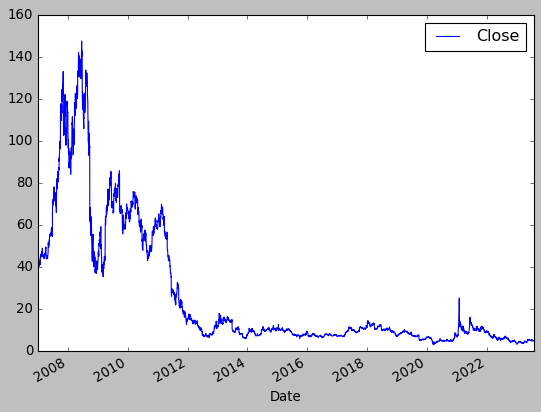

In [110]:
plt.style.use('classic')
blackberry.plot(y="Close")

#### 13.4 Creating Bar Graphs to Show Counts
- .plot(kind = "bar")
- .plot(kind = "barh")

In [111]:
blackberry = data.DataReader(name = "BB", data_source= "stooq", start= "2007-01-01",end= "2023-07-28")
blackberry.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-27,4.74,4.76,4.615,4.64,3650761.0
2023-07-26,4.69,4.73,4.640,4.67,2853430.0
2023-07-25,4.72,4.77,4.700,4.70,2813746.0


In [113]:
#I wanna do is to categorize each one of these stock performances.
def rank_performance(stock_price) :
    if stock_price <= 10 :
        return "Poor"
    elif stock_price <= 50:
        return "Satisfactory"
    else :
        return "Stellar"

<Axes: >

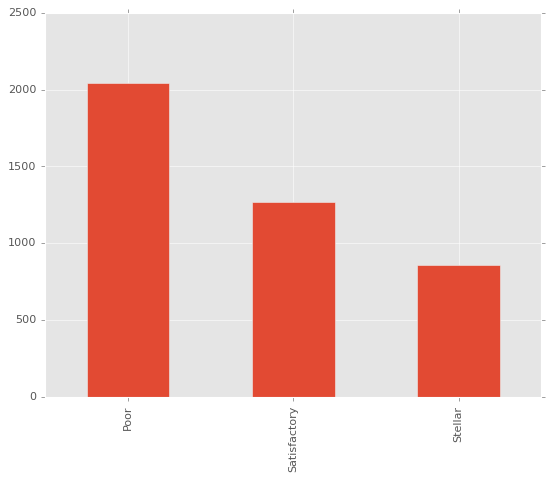

In [122]:
# apply blackberry["Close"] ลงใน rank_performance function
# หลังจากนั้นให้ใช้ .value_counts() เพื่อเป็นการนับจำนวนว่ามี Poor กี่ตัว Satistactory กี่ตัว Stella กี่ตัว โดยที่มีแกน x เป็น Date ซึ่งเป็น index 
# หลังจากนั้นก็ .plot() ได้เลย โดยใช้ kind เป็น "bar" หรือ "barh" for horizontal
plt.style.use("ggplot")
blackberry["Close"].apply(rank_performance).value_counts().plot(kind="bar")

<Axes: >

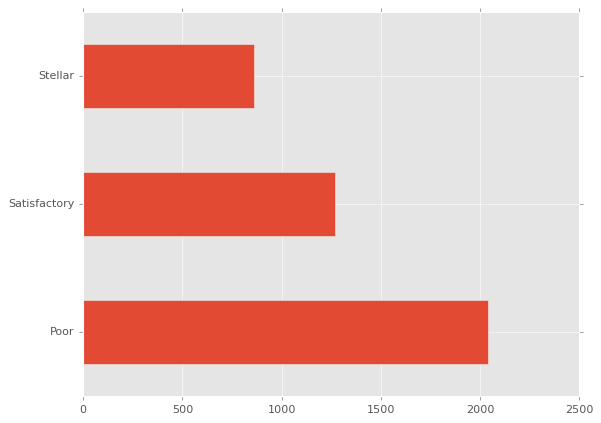

In [123]:
blackberry["Close"].apply(rank_performance).value_counts().plot(kind="barh")

#### 13.5 Creating Pie Charts to Represent Proportions
- .plot(kind = "pie")

In [124]:
blackberry = data.DataReader(name = "BB", data_source= "stooq", start= "2007-01-01",end= "2023-07-28")
blackberry.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-27,4.74,4.76,4.615,4.64,3650761.0
2023-07-26,4.69,4.73,4.640,4.67,2853430.0
2023-07-25,4.72,4.77,4.700,4.70,2813746.0


In [129]:
#ต้องการหาว่า จำนวนวันที่ Close price สูงกว่า average และ ต่ำกว่า average เป็นเท่าไรบ้าง
blackberry["Close"].mean()



26.043975419664267

In [130]:
def rank_performance(stock_price):
    if stock_price >= 26.043975419664267:
        return "Above Average"
    else :
        return "Below Average"

<Axes: ylabel='Close'>

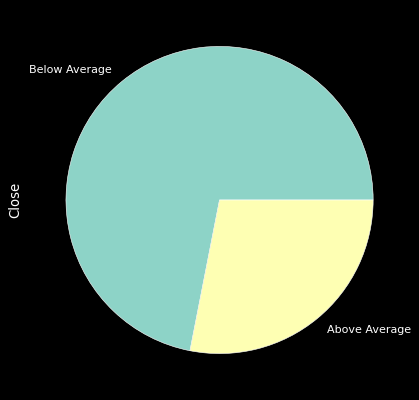

In [133]:
plt.style.use("dark_background")
blackberry["Close"].apply(rank_performance).value_counts().plot(kind = "pie")

<Axes: ylabel='Close'>

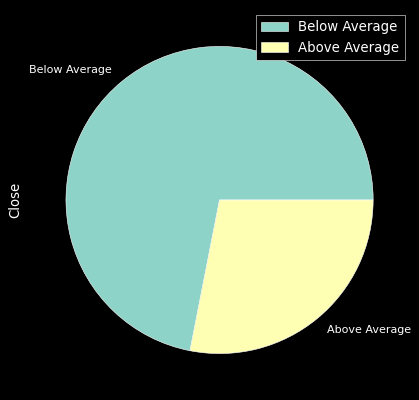

In [137]:
blackberry["Close"].apply(rank_performance).value_counts().plot(kind = "pie",legend = True)

# Section 14 : Options and Settings in pandas 

#### 14.1 Introduction to the Options and Settings Module

In [2]:
import pandas as pd
import numpy as np

#### 14.2 Changing pandas Options with Attributes and Dot Syntax

In [7]:
data = np.random.randint(0,100,[1000,50]) # random number 0-1000 ใน 1000 rows 50 columns
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,81,31,82,27,13,63,86,42,60,23,...,18,21,48,70,90,67,63,33,1,57
1,55,18,16,60,91,49,74,74,80,50,...,82,64,18,53,68,45,86,70,57,0
2,40,12,28,95,22,54,93,31,90,82,...,53,5,65,30,92,36,9,9,44,80
3,71,66,59,99,13,20,46,28,33,5,...,47,29,1,57,51,3,64,6,41,66
4,79,71,5,9,41,59,7,11,1,11,...,46,6,43,40,12,14,46,7,91,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14,25,22,68,74,55,96,36,2,47,...,35,20,78,16,73,87,34,11,65,21
996,49,31,51,28,50,13,98,89,36,24,...,79,92,14,20,81,53,89,90,7,83
997,76,75,5,5,76,48,35,29,60,20,...,57,3,22,81,3,72,10,78,78,6
998,8,39,5,84,61,67,95,49,88,6,...,97,33,12,86,65,3,12,35,80,87


In [6]:
pd.get_option("display.max_rows") 

60

In [5]:
pd.get_option("display.max_columns") 


20

In [8]:
pd.set_option("display.max_columns",10)
df

,0,1,2,3,4,...,45,46,47,48,49
0,81,31,82,27,13,...,67,63,33,1,57
1,55,18,16,60,91,...,45,86,70,57,0
2,40,12,28,95,22,...,36,9,9,44,80
3,71,66,59,99,13,...,3,64,6,41,66
4,79,71,5,9,41,...,14,46,7,91,24
...,...,...,...,...,...,...,...,...,...,...,...
995,14,25,22,68,74,...,87,34,11,65,21
996,49,31,51,28,50,...,53,89,90,7,83
997,76,75,5,5,76,...,72,10,78,78,6
998,8,39,5,84,61,...,3,12,35,80,87


In [9]:
pd.options.display.max_columns

10

In [11]:
pd.set_option("display.max_rows",7)
df


,0,1,2,3,4,...,45,46,47,48,49
0,81,31,82,27,13,...,67,63,33,1,57
1,55,18,16,60,91,...,45,86,70,57,0
2,40,12,28,95,22,...,36,9,9,44,80
...,...,...,...,...,...,...,...,...,...,...,...
997,76,75,5,5,76,...,72,10,78,78,6
998,8,39,5,84,61,...,3,12,35,80,87
999,36,20,61,56,39,...,42,69,88,19,38


In [12]:
pd.options.display.max_rows

7

In [13]:
pd.options.display.max_rows = 5
df

,0,1,2,3,4,...,45,46,47,48,49
0,81,31,82,27,13,...,67,63,33,1,57
1,55,18,16,60,91,...,45,86,70,57,0
...,...,...,...,...,...,...,...,...,...,...,...
998,8,39,5,84,61,...,3,12,35,80,87
999,36,20,61,56,39,...,42,69,88,19,38


In [15]:
pd.options.display.max_columns = 12
df

,0,1,2,3,4,5,...,44,45,46,47,48,49
0,81,31,82,27,13,63,...,90,67,63,33,1,57
1,55,18,16,60,91,49,...,68,45,86,70,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,8,39,5,84,61,67,...,65,3,12,35,80,87
999,36,20,61,56,39,58,...,55,42,69,88,19,38


In [16]:
# from pd.options.display.max_rows = 5
df.head(10)

,0,1,2,3,4,5,...,44,45,46,47,48,49
0,81,31,82,27,13,63,...,90,67,63,33,1,57
1,55,18,16,60,91,49,...,68,45,86,70,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,39,71,45,94,30,3,...,30,99,49,77,40,23
9,97,20,33,12,99,32,...,81,97,57,33,10,78


In [18]:
pd.options.display.max_rows = 20
df.head(10)

,0,1,2,3,4,5,...,44,45,46,47,48,49
0,81,31,82,27,13,63,...,90,67,63,33,1,57
1,55,18,16,60,91,49,...,68,45,86,70,57,0
2,40,12,28,95,22,54,...,92,36,9,9,44,80
3,71,66,59,99,13,20,...,51,3,64,6,41,66
4,79,71,5,9,41,59,...,12,14,46,7,91,24
5,19,61,69,70,57,84,...,42,21,29,64,92,37
6,76,95,77,52,3,83,...,19,46,50,5,92,69
7,82,84,24,32,24,22,...,15,66,71,48,51,96
8,39,71,45,94,30,3,...,30,99,49,77,40,23
9,97,20,33,12,99,32,...,81,97,57,33,10,78


#### 14.3 Changing pandas Options with Methods

In [19]:
data = np.random.randint(0,100,[1000,50]) # random number 0-1000 ใน 1000 rows 50 columns
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,...,44,45,46,47,48,49
0,26,29,32,51,69,93,...,97,93,73,44,76,41
1,13,20,31,52,19,48,...,40,90,16,98,20,34
2,67,4,47,11,91,85,...,80,92,56,82,45,20
3,78,47,81,94,31,25,...,60,65,18,35,71,67
4,87,90,14,40,26,73,...,54,84,36,13,34,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,78,50,76,12,45,57,...,20,78,78,27,1,87
996,73,47,63,16,78,96,...,55,82,6,37,93,35
997,88,32,27,16,65,94,...,12,42,56,4,90,58
998,57,85,0,39,11,3,...,31,5,96,46,25,61


In [21]:
pd.get_option("display.max_rows")

20

In [22]:
pd.get_option("display.max_columns")

12

In [33]:
pd.set_option("display.max_rows",8)
pd.set_option("display.max_columns",9)
df

,0,1,2,3,...,46,47,48,49
0,26,29,32,51,...,73,44,76,41
1,13,20,31,52,...,16,98,20,34
2,67,4,47,11,...,56,82,45,20
3,78,47,81,94,...,18,35,71,67
...,...,...,...,...,...,...,...,...,...
996,73,47,63,16,...,6,37,93,35
997,88,32,27,16,...,56,4,90,58
998,57,85,0,39,...,96,46,25,61
999,68,74,66,55,...,97,12,98,76


In [27]:
pd.options.display.max_columns
pd.options.display.max_rows

8

In [29]:
pd.options.display.max_columns = 5
pd.options.display.max_rows = 2
df

,0,1,...,48,49
0,26,29,...,76,41
...,...,...,...,...,...
999,68,74,...,98,76


In [34]:
pd.set_option("display.mAx_rOws",8)
pd.set_option("display.maX_ColumNs",15)
df

,0,1,2,3,4,5,6,...,43,44,45,46,47,48,49
0,26,29,32,51,69,93,49,...,11,97,93,73,44,76,41
1,13,20,31,52,19,48,27,...,5,40,90,16,98,20,34
2,67,4,47,11,91,85,24,...,39,80,92,56,82,45,20
3,78,47,81,94,31,25,0,...,1,60,65,18,35,71,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,73,47,63,16,78,96,11,...,12,55,82,6,37,93,35
997,88,32,27,16,65,94,39,...,24,12,42,56,4,90,58
998,57,85,0,39,11,3,68,...,68,31,5,96,46,25,61
999,68,74,66,55,11,57,17,...,8,41,25,97,12,98,76


In [35]:
pd.reset_option("display.max_rows")
df

,0,1,2,3,4,5,6,...,43,44,45,46,47,48,49
0,26,29,32,51,69,93,49,...,11,97,93,73,44,76,41
1,13,20,31,52,19,48,27,...,5,40,90,16,98,20,34
2,67,4,47,11,91,85,24,...,39,80,92,56,82,45,20
3,78,47,81,94,31,25,0,...,1,60,65,18,35,71,67
4,87,90,14,40,26,73,34,...,84,54,84,36,13,34,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,78,50,76,12,45,57,79,...,35,20,78,78,27,1,87
996,73,47,63,16,78,96,11,...,12,55,82,6,37,93,35
997,88,32,27,16,65,94,39,...,24,12,42,56,4,90,58
998,57,85,0,39,11,3,68,...,68,31,5,96,46,25,61


In [36]:
pd.reset_option("display.max_columns")
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,26,29,32,51,69,93,49,77,97,97,...,15,87,7,11,97,93,73,44,76,41
1,13,20,31,52,19,48,27,47,18,70,...,16,39,82,5,40,90,16,98,20,34
2,67,4,47,11,91,85,24,92,38,11,...,57,53,80,39,80,92,56,82,45,20
3,78,47,81,94,31,25,0,4,2,92,...,56,77,22,1,60,65,18,35,71,67
4,87,90,14,40,26,73,34,61,85,24,...,95,11,67,84,54,84,36,13,34,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,78,50,76,12,45,57,79,56,36,32,...,9,82,81,35,20,78,78,27,1,87
996,73,47,63,16,78,96,11,97,82,83,...,94,74,98,12,55,82,6,37,93,35
997,88,32,27,16,65,94,39,48,61,82,...,52,69,5,24,12,42,56,4,90,58
998,57,85,0,39,11,3,68,46,16,54,...,41,76,48,68,31,5,96,46,25,61


In [44]:
pd.reset_option("display.max_columns")
pd.describe_option("display.max_columns")
# [default: 20] [currently: 20]

display.max_columns : int
    If max_cols is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the width of the terminal and print a truncated object which fits
    the screen width. The IPython notebook, IPython qtconsole, or IDLE
    do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 20] [currently: 20]


In [45]:
pd.reset_option("display.max_rows")
pd.describe_option("display.max_rows")
# [default: 20] [currently: 20]

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 60]


In [46]:
pd.set_option("display.maX_ColumNs",15)
pd.describe_option("display.max_columns")
#pd.describe_option("display.max_columns")

display.max_columns : int
    If max_cols is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the width of the terminal and print a truncated object which fits
    the screen width. The IPython notebook, IPython qtconsole, or IDLE
    do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 20] [currently: 15]


#### 14.4 The precision Option

In [54]:
df = pd.DataFrame(np.random.randn(5,5))
df
# default ; 6 demical point

,0,1,2,3,4
0,0.62,1.03,0.06,-1.77,0.50
1,0.67,-0.22,-0.40,1.53,0.68
2,0.04,0.89,1.07,0.42,-2.52
3,-0.74,-0.39,-0.31,0.69,0.49
4,0.98,1.06,2.21,-0.76,-0.14


In [51]:
pd.get_option("display.precision")

6

In [53]:
# set demical points from 6 to 2 
pd.set_option("display.precision",2)
df

,0,1,2,3,4
0,0.45,-1.65,1.79,1.24,-0.80
1,-0.76,-0.83,1.30,0.18,0.07
2,-0.75,-0.14,-0.62,-0.37,0.93
3,-1.39,0.39,-0.19,-1.50,1.33
4,-0.50,0.03,-0.87,-0.24,1.36


# Section 15 : Conclusion  